Ultimate Take Home Challenge

In [110]:
import os
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt 
import datetime

In [2]:
os.getcwd()

'/Users/gwynethvolkmann'

In [3]:
path = path = '/Users/gwynethvolkmann/Downloads/ultimate_challenge'
os.chdir(path) 

In [4]:
os.getcwd()

'/Users/gwynethvolkmann/Downloads/ultimate_challenge'

In [5]:
df = pd.read_json('logins.json')

In [6]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


It does not seem that there are any missing or null values in this dataset so we can move with data exploration. 

In [8]:
df.iloc[[0, -1]]

,login_time
0,1970-01-01 20:13:18
93141,1970-04-13 18:54:23


In [9]:
df.count

<bound method DataFrame.count of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>

Since the data just involves one column of log in times, we will need to add a column of ones so that the login 
counts can be aggregated in 15 minutes increments as requested in the project description. 

In [10]:
df['login_count']= 1

In [11]:
df.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [12]:
df.set_index('login_time', inplace=True)
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [17]:
df_resample = df.resample('15Min').sum()

In [21]:
df_resample.dtypes

login_count    int64
dtype: object

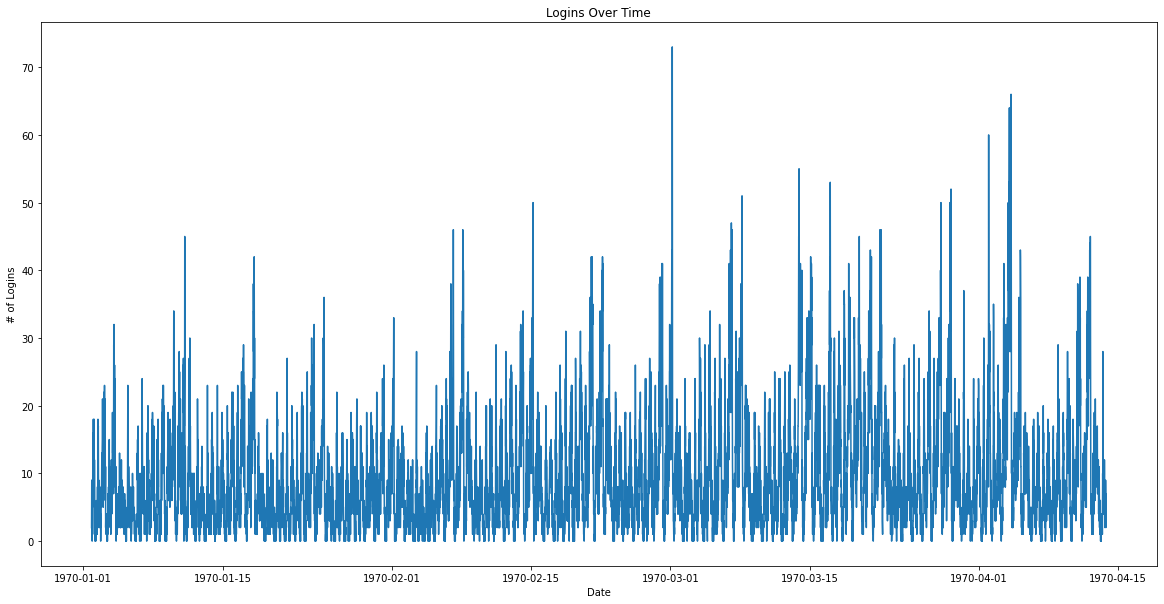

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.ylabel('# of Logins')
plt.xlabel('Date')
plt.title('Logins Over Time')
plt.plot(df_resample.index, df_resample.login_count)
plt.show()

From the plot of logins over time, it seems that there are some clear patterns emerging. We will need to more closely examine during what times of day and what days of the week more rides are occuring and see if this provides any insight. 

In [34]:
df_resample.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [72]:
df_resample = pd.DataFrame({'login_count':df_resample['login_count'],'month':df_resample.index.month, 
                            'hour':df_resample.index.hour,'day_date': df_resample.index.day, 
                            'day_of_week':df_resample.index.dayofweek}, index=df_resample.index)

In [73]:
df_resample.head()

,login_count,month,hour,day_date,day_of_week
login_time,,,,,
1970-01-01 20:00:00,2,1,20,1,3
1970-01-01 20:15:00,6,1,20,1,3
1970-01-01 20:30:00,9,1,20,1,3
1970-01-01 20:45:00,7,1,20,1,3
1970-01-01 21:00:00,1,1,21,1,3


In [46]:
df_day = df_resample.groupby('day_of_week').sum()

In [47]:
df_day.head()

,login_count,hour,day_date
day_of_week,,,
0,8823,16140,19996
1,9268,15456,20352
2,10339,15456,18720
3,11960,15800,20080
4,15208,16560,21600


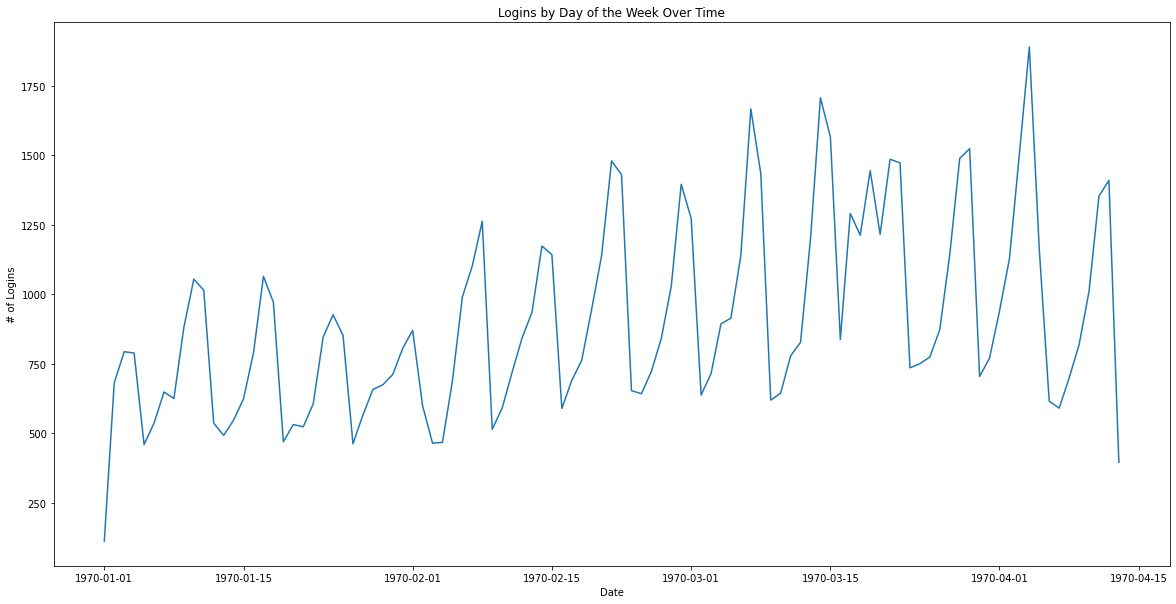

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df_resample['login_count'].resample('D').sum())
ax.set_ylabel('# of Logins')
ax.set_xlabel('Date')
ax.set_title('Logins by Day of the Week Over Time')
plt.show()

When grouping the logins by day of the week, it is clear that there are some cyclical patterns occuring. Riders are calling rides at a higher rate during certain times of the week. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


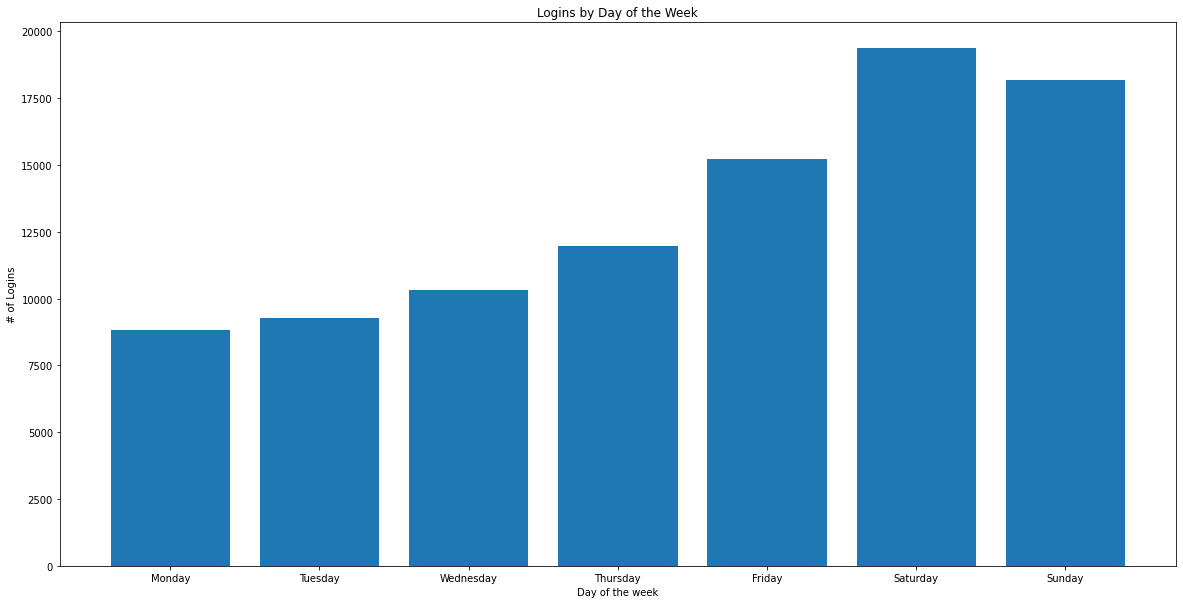

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_day.index,df_day.login_count)
ax.set_ylabel('# of Logins')
ax.set_xlabel('Day of the week')
ax.set_title('Logins by Day of the Week')
ax.set_xticklabels(('blank','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.show()

The number of logins increases over the week reaching a peak on Saturday. Sunday is the day of the week with the second largest number of rides. Monday is the day of the week with the fewest number of rides. This is probably due to the phenomenon of people going out on the weekend and drinking, thus requiring ride share services more frequently. To confirm whether this activity is occuring in the evening we can explore the distribution of logins during certain hours of the day. 

In [65]:
df_hour = df_resample.groupby('hour').sum()
df_hour.head()

,login_count,day_date,day_of_week
hour,,,
0,5993,5952,1236
1,6317,5952,1236
2,5800,5952,1236
3,4831,5952,1236
4,5034,5952,1236


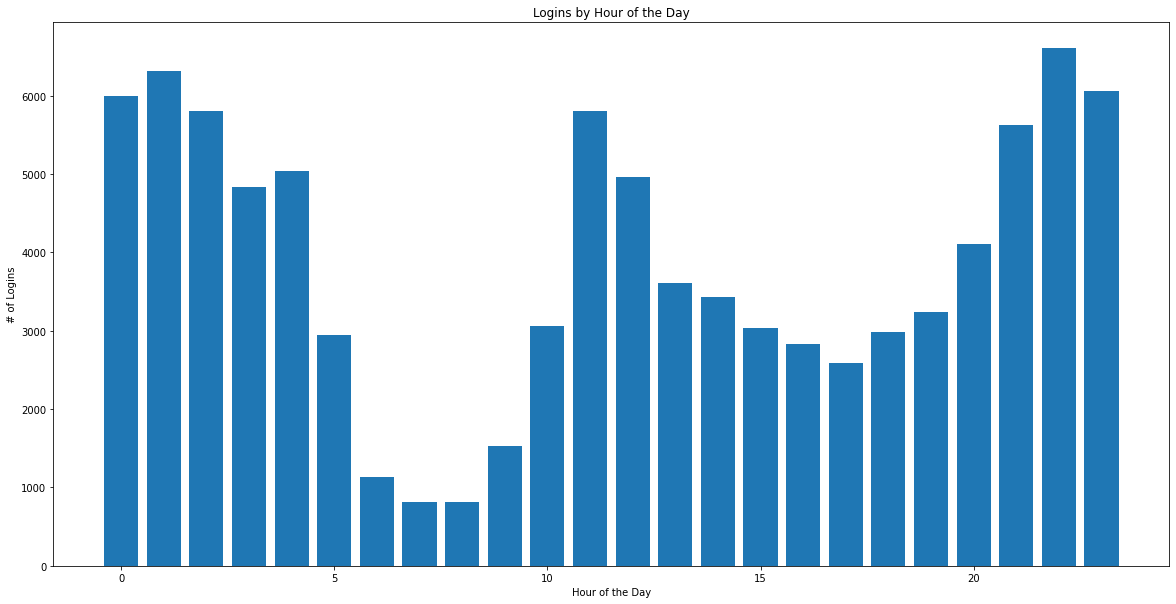

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_hour.index,df_hour.login_count)
ax.set_ylabel('# of Logins')
ax.set_xlabel('Hour of the Day')
ax.set_title('Logins by Hour of the Day')
plt.show()

In general it appears as though most rides are taken right before the middle of the day, which might indicate people going to lunch, and late at night. Rides increase from 6pm until around 10pm when they are at a peak and remain high until around 4am. These rides are most likely from people going out in the evening and then taking rides home after going out. 

Next I will examine seasonal patterns for rides. I expect that people will take more rides when it is colder and fewer rides as the weather becomes warmer. 

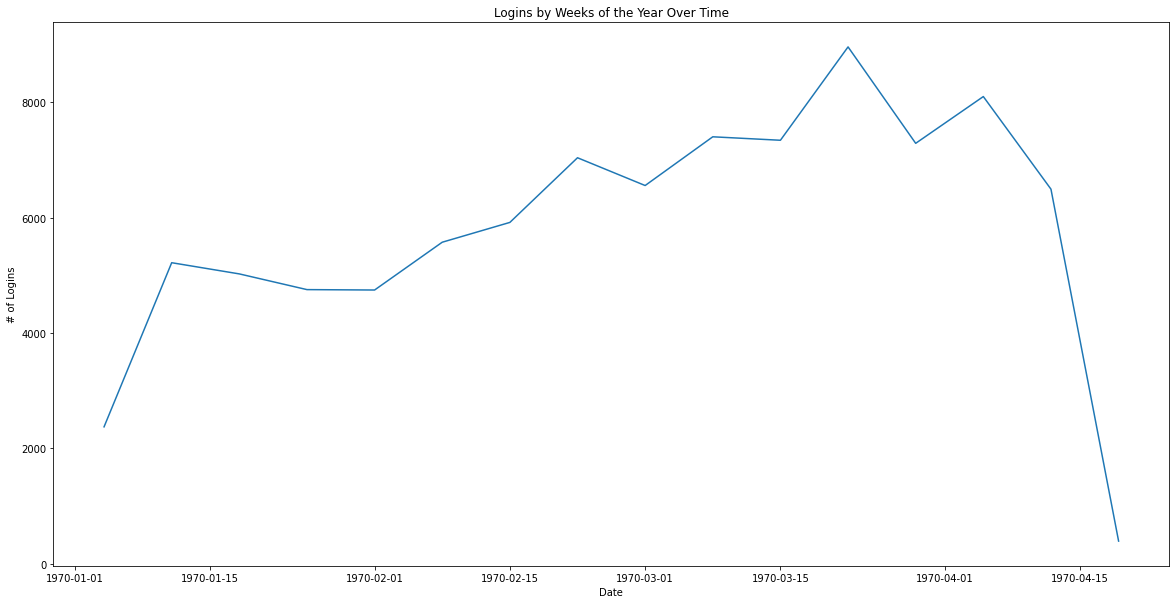

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df_resample['login_count'].resample('W').sum())
ax.set_ylabel('# of Logins')
ax.set_xlabel('Date')
ax.set_title('Logins by Weeks of the Year Over Time')
plt.show()

My assumption was incorrect. It seems that as the weather becomes warmer in mid-March and April, people take more rides. I assumed that people would have the same level of activity and use rides more frequently during colder weather, but it seems that the level of acitivity may actually be lower in winter with people going out less frequently and increasing their outings as the weather becomes warmer. 

In [74]:
df_month = df_resample.groupby('month').sum()
df_month.head()

,login_count,hour,day_date,day_of_week
month,,,,
1,21239,33464,47536,8976
2,24673,30912,38976,8064
3,33723,34224,47616,8736
4,13507,13932,8476,3936


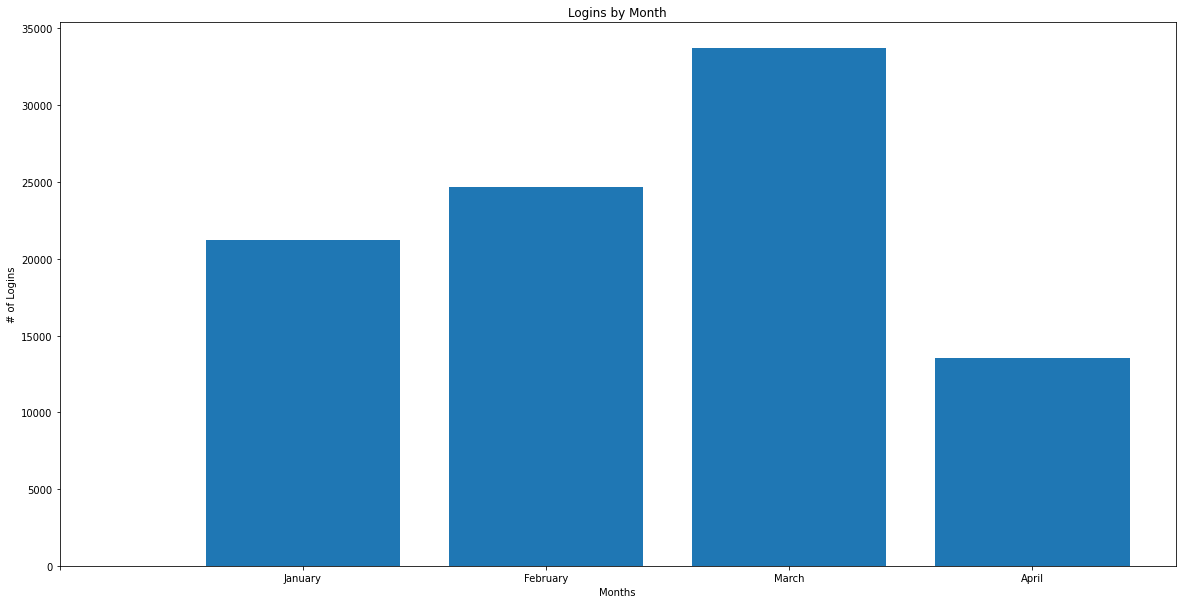

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_month.index,df_month.login_count)
ax.set_ylabel('# of Logins')
ax.set_xlabel('Months')
ax.set_title('Logins by Month')
plt.xticks([0,1,2,3,4],['','January','February','March','April'])
plt.show()

This bar graph shows that rides increase from January to March. April is a much lower number of rides, however the data cuts off in the middle of the month. It looks like the month was on track to have about the same number of rides as March, or slightly fewer. 

In [87]:
hours = df.resample('H').sum()
hours.head()

,login_count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [93]:
hours['day_of_week'] = hours.index.dayofweek
hours['hour'] = [time.hour for time in hours.index]

In [94]:
hours.head()

,login_count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,24,3,20
1970-01-01 21:00:00,9,3,21
1970-01-01 22:00:00,21,3,22
1970-01-01 23:00:00,58,3,23
1970-01-02 00:00:00,53,4,0


Text(0.5, 1.0, 'Logins by Day and Hour')

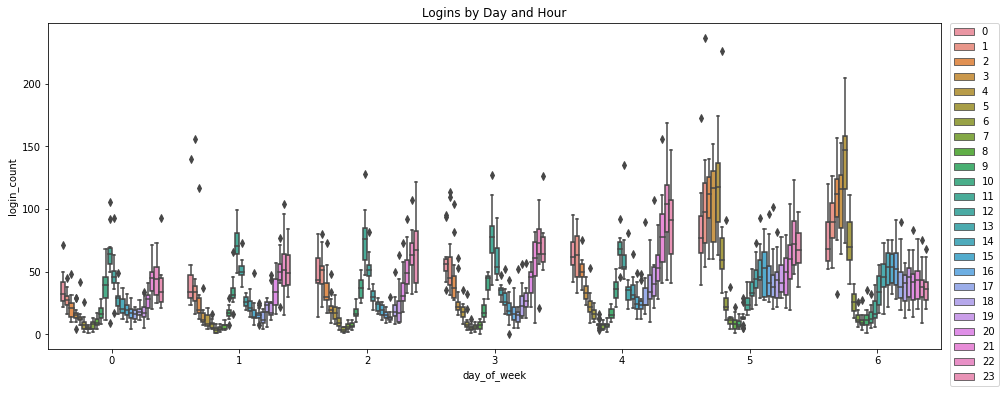

In [109]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="day_of_week", y="login_count", hue="hour",data=hours)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Logins by Day and Hour')

This graph shows the general trend of daily rides. There are the most rides early in the morning and in the evening and late at night. There is also a spike in rides in the middle of the day and this pattern of mid-day rides is most promiment during the weekdays. On the weekends people tend to take more rides in the very early morning and late evening with the exception of Sunday night when people are not taking as many rides. 